In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
len(tf.config.list_physical_devices('GPU'))

1

In [3]:
def import_maps(path):
    images = []
    for index, name in enumerate(os.listdir(path)):
        folder = os.path.join(path, name)
        for file_class in os.listdir(folder):
            im_folder = os.path.join(folder, file_class)
            for im in os.listdir(im_folder):
                img = cv2.imread(os.path.join(im_folder, im))
                #print(img.shape)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                    img1 = cv2.resize(img, (112, 112))
                    img = np.dstack((img1,img1,img1))
                if img is not None:
               #     img = (img-np.mean(img))/np.std(img)
                    images.append((np.array(img), index)) 
    return images

In [4]:
image_train_set = import_maps(r'C:\Users\AIIMS-IITD\Desktop\Sanjeev\4_class_cluster_volume\Train')
image_test_set = import_maps(r'C:\Users\AIIMS-IITD\Desktop\Sanjeev\4_class_cluster_volume\Test')

In [5]:
train_images_all = [i[0] for i in image_train_set]
train_images_array = np.array(train_images_all)
#train_images_array=np.expand_dims(train_images_array,axis=3)
train_image_label = [i[1] for i in image_train_set]
train_image_label = np.array(train_image_label)

In [6]:
test_images_all = [i[0] for i in image_test_set]
test_images_array = np.array(test_images_all)
#test_images_array=np.expand_dims(test_images_array,axis=3)
test_image_label = [i[1] for i in image_test_set]
test_image_label = np.array(test_image_label)

In [7]:
scalar = StandardScaler(copy=False)
train_images = scalar.fit_transform(train_images_array.reshape(len(train_images_array), 112*112*3))
train_images_array = train_images.reshape(len(train_images_array), 112,112, 3)

In [8]:
train_x, val_x, train_y, val_y = train_test_split(train_images_array,train_image_label,test_size=0.2)

In [9]:
enc = OneHotEncoder(handle_unknown='ignore')
train_label_enc = enc.fit_transform(train_y.reshape(-1, 1)).toarray()
val_label_enc = enc.fit_transform(val_y.reshape(-1, 1)).toarray()
test_label_enc = enc.fit_transform(test_image_label.reshape(-1, 1)).toarray()

In [10]:
test_label_enc.shape

(2160, 4)

In [10]:
#model.compile(loss=keras.losses.categorical_crossentropy,optimizer = keras.optimizers.SGD(0.001),metrics=['accuracy','auc'])

In [11]:
#history = model.fit(train_x,train_label_enc,validation_data=(val_x,val_label_enc), batch_size=32, epochs=6, verbose=1,shuffle=True)

# VGG Pretrained

In [11]:
from keras.applications.vgg16 import VGG16


In [12]:
model = VGG16()
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
from keras.layers import Flatten,Dropout,Dense,Activation,Input
from keras.models import Model
from tensorflow.keras import regularizers
new_input = Input(shape=(224, 224, 1))
model1 = VGG16(include_top = False, input_shape=(112,112,3))
layer = model1.get_layer('block5_pool').output
x = Flatten()(layer)
x = Dropout(0.5)(x)
x = Dense(128,activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.25)(x)
out = Dense(4,activation = 'softmax')(x)
model = Model(model1.input,out)

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer = keras.optimizers.SGD(0.001),metrics=['accuracy','AUC'])

In [15]:
history = model.fit(train_x,train_label_enc,validation_data=(val_x,val_label_enc), batch_size=32, epochs=20, verbose=1,shuffle=True)

Epoch 1/20
426/426 [==============================] - 166s 147ms/step - loss: 1.3186 - accuracy: 0.4547 - auc: 0.7339 - val_loss: 1.5285 - val_accuracy: 0.3525 - val_auc: 0.6888acy: 0.3 - ETA: 25s - loss: 1.5326 - accuracy: 0.34 - ETA: 24 - ETA: 20s - loss: 1.4625 - accurac - ETA: 19s - loss: 1.4436 - accuracy: 0.3825 - au - ETA: 18s - loss: 1.4382 - accuracy: 0. - ETA: 17s - loss: 1.4250 - accuracy: 0.3911 -  - ETA: 16s - loss: 1.4204 - accuracy: 0.3917 - auc: 0.676 - ETA - ETA: 13s - loss: 1.3966 - accuracy: 0.4069 - auc: - ETA: 12s - loss: 1.3934 - accuracy: 0.408 - ETA: 11s - loss: 1.3838 - accuracy: 0.4158 - ETA: 10s - loss: 1.3793 - accur - ETA: 9s - loss: 1.3714 -  - ETA: 8s - loss: 1.3 - ETA: 7s - loss: 1.3582 -  - ETA: 6s - loss: 1.3509 - accuracy: 0.4352 - - ETA: 5s - loss: 1.3478 - accuracy: 0.4370 - auc - ETA: 5s - loss: 1.3462 - accuracy: 0.4380 - auc:  - ETA: 5s - loss: 1.3 - ETA: 4s - loss: 1.3401 - accura - ETA: 3s - loss: 1 - ETA: 2s - loss: 1.3292 - accuracy: 0.4481 -

426/426 [==============================] - 32s 74ms/step - loss: 0.2130 - accuracy: 0.9781 - auc: 0.9982 - val_loss: 0.1353 - val_accuracy: 0.9991 - val_auc: 1.0000 0.6386 - accuracy: 0.8594 - a - ETA: 26s - loss: 0.5394  - ETA: 24s - loss: 0.3908 - accuracy: 0.9297 - auc: 0. - ETA: 23 - ETA: 20s - loss: 0.3025 - accuracy: 0.9 - ETA: 19s - loss: 0.2865 - accuracy: 0.9581 -  - ETA: 18s - loss: 0.2781 - accuracy: 0.9606 - auc: 0. - ETA: 18s - loss: 0.2747 - accuracy: 0.9616 - auc: 0. - ET - ETA: 14s - loss: 0.2460 - accur - ETA: 12s - loss: 0.2370 - accuracy: 0.9714 - auc: 0. - ETA: 12s - loss: 0.2355 - a
Epoch 9/20
426/426 [==============================] - 32s 74ms/step - loss: 0.1518 - accuracy: 0.9940 - auc: 0.9999 - val_loss: 0.1317 - val_accuracy: 1.0000 - val_auc: 1.0000509 - accuracy: 0.9935 - auc: - ETA: 27s - loss: 0.1501 - accuracy - ETA: 25s - loss: 0.1488 - accuracy: 0.9947 - auc: - ETA: 25s - loss: 0.1506 - accuracy: 0.9937 - auc: 1. - ETA: 24s - loss: 0.1523 - accuracy: 0.

426/426 [==============================] - 31s 73ms/step - loss: 0.1439 - accuracy: 0.9967 - auc: 0.9997 - val_loss: 0.1297 - val_accuracy: 1.0000 - val_auc: 1.0000.1343 - accuracy: 0.9986 - auc: - ETA: 26s - loss: 0.1359 - accuracy: - ETA: 25s - loss: 0.1377 - accuracy: 0.9975 - a - ETA: 24s - loss: 0.1912 - accuracy: 0.9849 - auc: 0.998 - ETA: 24s - loss: 0.1903 - accuracy: 0.9851 - - ETA: 23s - loss: 0.1833 - accuracy: 0.9872 - auc: 0.9 - ETA: 23s - lo - ETA: 20s - loss: 0.1655 - accuracy: 0.9921 - ETA: 19s - loss: 0.1623 - accuracy: 0.9927 - - ETA: 19s - loss: 0.1602 - accuracy: 0.9933 - auc: 0 - ETA: 18s - loss: 0.1592 - acc - ETA: 16s - loss: 0.1553 - accuracy - ETA: 15s - loss: 0.1533 - accuracy: 0.9 - ETA: 14s - loss: 0.1517 - accuracy: 0.9951 -  - ETA: 13s - loss: 0.1508 - accuracy: 0.9953 - a - ETA: 12s - loss: 0.1499 - accuracy: 0.9955 -  - ETA: 12s - loss: 0.1492 - accuracy: 0 - ETA: 10s - loss: 0.1480 - accuracy - ETA: 9s - loss: 0.147 - ETA: 8s - loss: - ETA: 7s - loss: 0

In [16]:
test_image = scalar.fit_transform(test_images_array.reshape(len(test_images_array),112*112*3))
test_image_array = test_image.reshape(len(test_images_array),112,112,3)

In [47]:
score = model.evaluate(test_image_array,test_label_enc, batch_size=16)

135/135 [==============================] - 2s 15ms/step - loss: 5.3433 - accuracy: 0.4343 - auc: 0.6728 0s - loss: 5.9433 - ac


In [18]:
y_predict = model.predict(test_image_array)

In [19]:
y_predict_bool = np.argmax(y_predict,axis=1).tolist()

In [20]:
from sklearn.metrics import confusion_matrix,precision_score,auc,recall_score,roc_curve,precision_recall_curve

In [21]:
confusion_matrix(test_image_label,y_predict_bool)

array([[542,   0, 167, 101],
       [  4,   0,  39, 257],
       [ 63,   0, 224, 313],
       [127,  40, 111, 172]], dtype=int64)

In [22]:
precision_score(test_image_label,y_predict_bool,average='weighted')

0.4336751607992787

In [23]:
recall_score(test_image_label,y_predict_bool,average='weighted')

0.43425925925925923

In [24]:
from sklearn.metrics import *

In [25]:
print(classification_report(test_image_label,y_predict_bool))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       810
           1       0.00      0.00      0.00       300
           2       0.41      0.37      0.39       600
           3       0.20      0.38      0.27       450

    accuracy                           0.43      2160
   macro avg       0.34      0.36      0.34      2160
weighted avg       0.43      0.43      0.43      2160



In [26]:
fpr,tpr,thresholds = roc_curve(test_image_label,y_predict_bool,pos_label=3)
print(auc(fpr,tpr))

0.5080045484080571


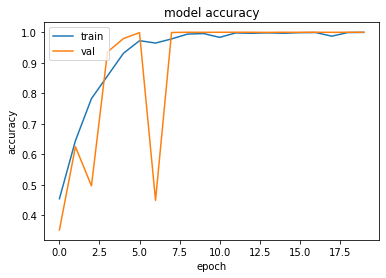

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

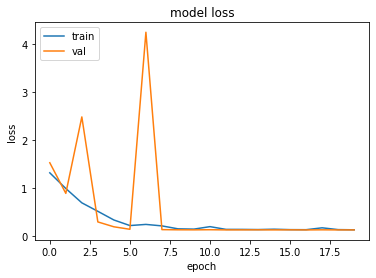

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

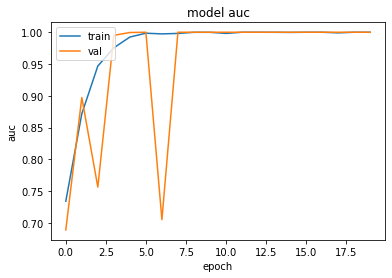

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Volume Testing

In [41]:
folder = data = r'C:\Users\AIIMS-IITD\Desktop\Sanjeev\4_class_cluster_volume\Train\00_5\161885'

In [29]:
score = model.evaluate(test_image_array[0:810],test_label_enc[0:810], batch_size=32)

26/26 [==============================] - 1s 42ms/step - loss: 3.2835 - accuracy: 0.6691 - auc: 0.8146


In [30]:
test_label_enc[810:812]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [31]:
score = model.evaluate(test_image_array[0:150],test_label_enc[0:150], batch_size=32)

5/5 [==============================] - 1s 191ms/step - loss: 0.7228 - accuracy: 0.8267 - auc: 0.9569


In [32]:
y_predict = model.predict(test_image_array[0:150])
y_predict_bool = np.argmax(y_predict,axis=1).tolist()

In [33]:
confusion_matrix(test_image_label[0:150],y_predict_bool)

array([[124,  24,   2],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=int64)

In [34]:
print(classification_report(test_image_label[0:150],y_predict_bool))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       150
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.83       150
   macro avg       0.33      0.28      0.30       150
weighted avg       1.00      0.83      0.91       150



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 11_16

In [35]:
score = model.evaluate(test_image_array[1110:1860],test_label_enc[1110:1860], batch_size=32)

24/24 [==============================] - 1s 44ms/step - loss: 4.4671 - accuracy: 0.3560 - auc: 0.6503


In [36]:
test_label_enc[1110:1860]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [37]:
score = model.evaluate(test_image_array[1110:1260],test_label_enc[1110:1260], batch_size=32)

5/5 [==============================] - 0s 25ms/step - loss: 2.0871 - accuracy: 0.4067 - auc: 0.7515


In [38]:
score = model.evaluate(test_image_array[1260:1410],test_label_enc[1260:1410], batch_size=32)

5/5 [==============================] - 1s 23ms/step - loss: 5.6258 - accuracy: 0.3400 - auc: 0.6452


In [39]:
score = model.evaluate(test_image_array[1410:1560],test_label_enc[1410:1560], batch_size=32)

5/5 [==============================] - 0s 22ms/step - loss: 9.9078 - accuracy: 0.0000e+00 - auc: 0.3203


In [40]:
score = model.evaluate(test_image_array[1560:1710],test_label_enc[1560:1710], batch_size=32)

5/5 [==============================] - 0s 23ms/step - loss: 1.3802 - accuracy: 0.7467 - auc: 0.9079


In [41]:
score = model.evaluate(test_image_array[1710:1860],test_label_enc[1710:1860], batch_size=32)

5/5 [==============================] - 0s 23ms/step - loss: 3.3344 - accuracy: 0.2867 - auc: 0.6216


In [42]:
2460+150

2610

# 17_28

In [43]:
score = model.evaluate(test_image_array[1860:],test_label_enc[1860:], batch_size=32)

10/10 [==============================] - 1s 75ms/step - loss: 3.0913 - accuracy: 0.4300 - auc: 0.6924


In [44]:
score = model.evaluate(test_image_array[1860:2010],test_label_enc[1860:2010], batch_size=32)

5/5 [==============================] - 0s 21ms/step - loss: 3.5788 - accuracy: 0.3667 - auc: 0.6581


In [45]:
score = model.evaluate(test_image_array[2010:2160],test_label_enc[2010:2160], batch_size=32)

5/5 [==============================] - 0s 23ms/step - loss: 2.6039 - accuracy: 0.4933 - auc: 0.7312


In [46]:
score = model.evaluate(test_image_array[2160:2310],test_label_enc[2160:2310], batch_size=32)

C:\Users\AIIMS-IITD\AppData\Roaming\Python\Python38\site-packages\keras\utils\generic_utils.py:915: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

In [83]:
score = model.evaluate(test_image_array[2310:2460],test_label_enc[2310:2460], batch_size=32)

5/5 [==============================] - 0s 24ms/step - loss: 2.5747 - accuracy: 0.4333 - auc: 0.6945


In [85]:
score = model.evaluate(test_image_array[2460:2610],test_label_enc[2460:2610], batch_size=32)

5/5 [==============================] - 0s 23ms/step - loss: 0.0453 - accuracy: 0.9733 - auc: 0.9996
